Tips: This example notebook `example_nuclei` is debugged in Google Colab due to the privacy of original images(everyone with a UW email address can view the original images). If you run this notebook on your local machine, there might be some tiny adjustment. Code of importing customized modules is more straightforward but you need to pre-download the original images. Feel free to create a new issue in our github if you have any questions. Our github address is `https://github.com/jingexu/cells-in-gel`

At the very beginning, we import fundamental analysis packages `pandas`,`numpy`,`matplotlib.pyplot`, and `sys`.

Add the path of our customized modules for image processing from Google Drive, then we are able to import our own modules to this notebook.

In [0]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

In [0]:
sys.path.append('/content/drive/My Drive/Colab Notebooks/cells_in_gel')

In [0]:
import preprocess as pre
import properties as pro

First, we extract all the images of nucleus(started with 'C2' in the folder) into a list by calling the function `list_of_images` in `preprocess` module.

In [0]:
tifflist = pre.list_of_images('C2')

In [5]:
len(tifflist)

60

We can have a look at one sample image.

(-0.5, 1023.5, 1023.5, -0.5)

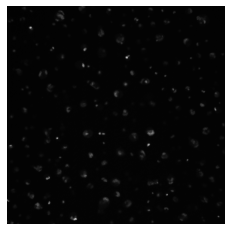

In [16]:
im = plt.imread(tifflist[0])
fig,ax = plt.subplots()
ax.imshow(im,cmap='gray')
ax.axis('off')

Such a vague image that it's hard to observe, not to mention an analysis. Thus the urgent work is to enhance the nucleus in the image.

Our group customized two function for such an enhancement, `sharpen_nuclei` and `enhance_nucleis`. Each funtion contains two enhancement method and now we call this two function for visualizaiton.

In [0]:
im = plt.imread(tifflist[0])

(1024, 1024)
0.11922240086830373


/usr/local/lib/python3.6/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type bool to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


0.10458118709560899
0.02972059285278439


[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

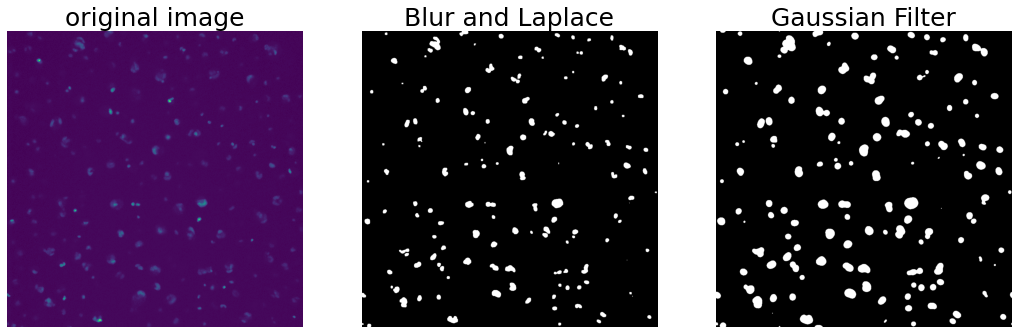

In [0]:
pre.sharpen_nuclei(im)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

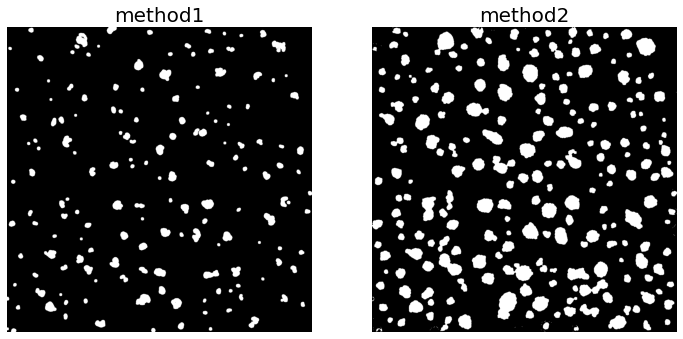

In [0]:
pre.enhance_nucleis(im)

A brief comparison: the function `sharpen_nuclei` is doing a good job, but both of its outputs indicate nuclei loss to some extent. As a contrast, the function `enhance_nucleis` reduce the nuclei loss. And nucleus from method1 have a morphology closer to the original image. As a result, we choose the output of method1 in `enhance_nucleis` for later processing.

Then, we directly call the function `counting_nucleis` in the `properties` module and treat our imagelist of nucleus. This function will first sharpen the nucleus in object images and then count how many nucleus are there in the object image. 

In [6]:
dt = pro.counting_nucleis(tifflist)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


As the dataframe above shows, we obtain the counts of nucleus in the image. The influence of different condition(cell type, ECM type, and w/o RGD) on the counts may not worth analyzing, but they can be used for normalization for subsequent analysis, which are convincing substrates.

In [18]:
dt.head(7).append(dt.tail(6))

,cell_type,ecm_cond,rgd_cond,counts
0,C2-NTG-CFbs,NoECM,0mMRGD,158
1,C2-NTG-CFbs,NoECM,0mMRGD,223
2,C2-NTG-CFbs,NoECM,0mMRGD,215
3,C2-I61QTTA-CFbs,NoECM,0mMRGD,164
4,C2-I61QTTA-CFbs,NoECM,0mMRGD,73
5,C2-I61QTTA-CFbs,NoECM,0mMRGD,88
6,C2-NTG-CFbs,NoECM,1mMRGD,182
54,C2-NTG-CFbs,I61Q5ECM,1mMRGD,36
55,C2-NTG-CFbs,I61Q5ECM,1mMRGD,29
56,C2-NTG-CFbs,I61Q5ECM,1mMRGD,17


In [0]:
dt['counts'] = dt['counts'].astype('int')
dt['cell_type'] = dt['cell_type'].astype('str')
dt['ecm_cond'] = dt['ecm_cond'].astype('str')
dt['rgd_cond'] = dt['rgd_cond'].astype('str')

As shown in the dataframe above, for every hydrogel environment, there are three samples, thus we use a group the data belonging to the same hydrogel environment. And calculate the mean value and  standard deviation value of the nuclei counts.

In [0]:
data = dt.groupby(['cell_type','ecm_cond','rgd_cond'])['counts']

In [0]:
dmean = pd.DataFrame(data.mean())

In [21]:
dmean

counts
cell_type       ecm_cond rgd_cond            
C2-I61QTTA-CFbs I61Q1ECM 0mMRGD     68.666667
                         1mMRGD     88.000000
                I61Q5ECM 0mMRGD    114.666667
                         1mMRGD    317.333333
                NTG1ECM  0mMRGD    418.000000
                         1mMRGD     87.666667
                NTG5ECM  0mMRGD    296.333333
                         1mMRGD    193.000000
                NoECM    0mMRGD    108.333333
                         1mMRGD    372.000000
C2-NTG-CFbs     I61Q1ECM 0mMRGD     34.333333
                         1mMRGD     26.333333
                I61Q5ECM 0mMRGD    156.000000
                         1mMRGD     27.333333
                NTG1ECM  0mMRGD    361.000000
                         1mMRGD     63.000000
                NTG5ECM  0mMRGD    244.333333
                         1mMRGD    156.000000
                NoECM    0mMRGD    198.666667
                         1mMRGD    255.333333

In [0]:
dstd = pd.DataFrame(data.std())

In [13]:
dstd

counts
cell_type       ecm_cond rgd_cond            
C2-I61QTTA-CFbs I61Q1ECM 0mMRGD     39.627432
                         1mMRGD     51.468437
                I61Q5ECM 0mMRGD     49.662192
                         1mMRGD    171.418591
                NTG1ECM  0mMRGD     30.446675
                         1mMRGD     38.630730
                NTG5ECM  0mMRGD    165.994980
                         1mMRGD     28.827071
                NoECM    0mMRGD     48.788660
                         1mMRGD     31.764760
C2-NTG-CFbs     I61Q1ECM 0mMRGD      8.020806
                         1mMRGD     27.537853
                I61Q5ECM 0mMRGD     34.176015
                         1mMRGD      9.609024
                NTG1ECM  0mMRGD     37.643060
                         1mMRGD     15.716234
                NTG5ECM  0mMRGD     62.067168
                         1mMRGD     51.797683
                NoECM    0mMRGD     35.444793
                         1mMRGD     72.514366

As the dataframe above shows, we obtain the counts of nucleus in the image. The influence of different condition(cell type, ECM type, and w/o RGD) on the nuclei counts may not be an essential index, but they are definitely a convincing normalization value for subsequent analysis.